# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [181]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [191]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=3500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=3500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1114

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [192]:
# Build query URL
#url = 'http://api.openweathermap.org/data/2.5/weather?q={}&'.format(city)
#city = "London,uk"
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units="metric"
    
# Build partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q="  

In [247]:
# set up lists to hold response info
lat = []
lon = []
temp = []
clouds = []
wind = []
humidity = []
country = []
id = []

# Loop through the list of cities and perform a request for data on each, pad "blank data with zeroes (0)"
for city in cities:
    response = requests.get(query_url + city).json()
    try:  
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        id.append(response['id'])
    except KeyError:
        lon.append(0)
        lat.append(0)
        temp.append(0)
        humidity.append(0)
        wind.append(0)
        clouds.append(0)
        country.append(" ")
        id.append(1000000)

In [248]:
print (len(cities), len(lat), len(lon), len(temp), len(humidity), len(wind), len(clouds), len(country), len(id))

1114 1114 1114 1114 1114 1114 1114 1114 1114


In [249]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city_name": cities,
    "city_number": id,
    "country": country,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "humidity": humidity,
    "wind": wind,
    "clouds": clouds
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city_name,city_number,country,lat,lon,temp,humidity,wind,clouds
0,avarua,4035715,CK,-21.21,-159.78,28.00,88,3.10,1
1,butaritari,2110227,KI,3.07,172.79,28.46,80,9.01,51
2,mataura,6201424,NZ,-46.19,168.86,12.24,53,0.74,0
3,barentsburg,1000000,,0.00,0.00,0.00,0,0.00,0
4,constitucion,3893726,CL,-35.33,-72.42,11.55,65,2.97,0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [250]:
# Export file as a CSV, without the Pandas index, but with the header
#output_data_file = "output_data/cities.csv"
weather_data.to_csv(output_data_file, index=False, header=True)

In [251]:
weather_data.head(12)

,city_name,city_number,country,lat,lon,temp,humidity,wind,clouds
0,avarua,4035715,CK,-21.21,-159.78,28.00,88,3.10,1
1,butaritari,2110227,KI,3.07,172.79,28.46,80,9.01,51
2,mataura,6201424,NZ,-46.19,168.86,12.24,53,0.74,0
3,barentsburg,1000000,,0.00,0.00,0.00,0,0.00,0
4,constitucion,3893726,CL,-35.33,-72.42,11.55,65,2.97,0
5,illoqqortoormiut,1000000,,0.00,0.00,0.00,0,0.00,0
6,jeremie,3723593,HT,18.65,-74.12,26.35,77,0.92,5
7,columbus,4509177,US,39.96,-83.00,8.09,43,1.50,20
8,okato,2185763,NZ,-39.20,173.88,16.67,65,3.58,97
9,bluff,2206939,NZ,-46.60,168.33,10.84,57,1.77,2


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [252]:
weather_data.head(12)

,city_name,city_number,country,lat,lon,temp,humidity,wind,clouds
0,avarua,4035715,CK,-21.21,-159.78,28.00,88,3.10,1
1,butaritari,2110227,KI,3.07,172.79,28.46,80,9.01,51
2,mataura,6201424,NZ,-46.19,168.86,12.24,53,0.74,0
3,barentsburg,1000000,,0.00,0.00,0.00,0,0.00,0
4,constitucion,3893726,CL,-35.33,-72.42,11.55,65,2.97,0
5,illoqqortoormiut,1000000,,0.00,0.00,0.00,0,0.00,0
6,jeremie,3723593,HT,18.65,-74.12,26.35,77,0.92,5
7,columbus,4509177,US,39.96,-83.00,8.09,43,1.50,20
8,okato,2185763,NZ,-39.20,173.88,16.67,65,3.58,97
9,bluff,2206939,NZ,-46.60,168.33,10.84,57,1.77,2


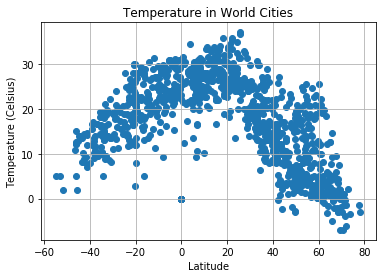

In [254]:
# Build a scatter plot for each data type

x_values = []
y_values = []

# Save the figure
#plt.savefig("CityTemperaturevsTemperaturePlot.png")

# Show plot
#plt.show()

#for count in len(weather_data):
x_values = weather_data['lat']
y_values = weather_data['temp']

plt.scatter(x_values, y_values)
#plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

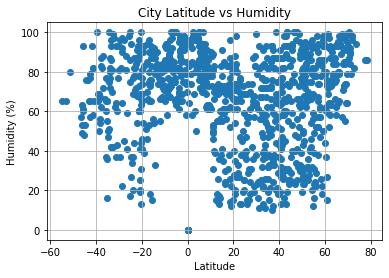

In [255]:
# Build a scatter plot for each data type
#plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

x_values = []
y_values = []

# Save the figure
#plt.savefig("CityLatitudevsHumidityPlot.png")

# Show plot
#plt.show()

#for count in len(weather_data):
x_values = weather_data['lat']
y_values = weather_data['humidity']

plt.scatter(x_values, y_values)
#plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsHumidityPlot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

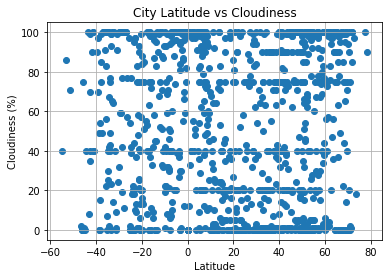

In [256]:
# Build a scatter plot for each data type
#plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

x_values = []
y_values = []

# Save the figure
#plt.savefig("CityLatitudevsHumidityPlot.png")

# Show plot
#plt.show()

#for count in len(weather_data):
x_values = weather_data['lat']
y_values = weather_data['clouds']

plt.scatter(x_values, y_values)
#plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsCloudinessPlot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

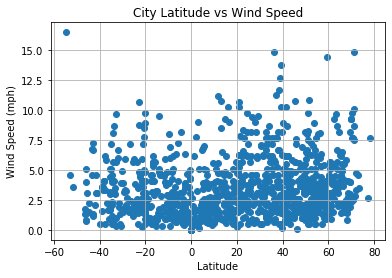

In [257]:
# Build a scatter plot for each data type
#plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

x_values = []
y_values = []

# Save the figure
#plt.savefig("CityLatitudevsHumidityPlot.png")

# Show plot
#plt.show()

#for count in len(weather_data):
x_values = weather_data['lat']
y_values = weather_data['wind']

plt.scatter(x_values, y_values)
#plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsWindSpeedPlot.png")

# Show plot
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


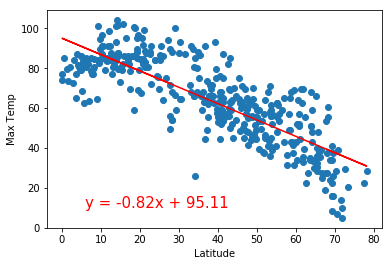

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


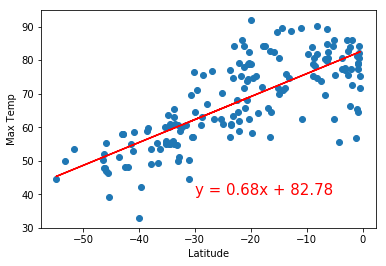

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


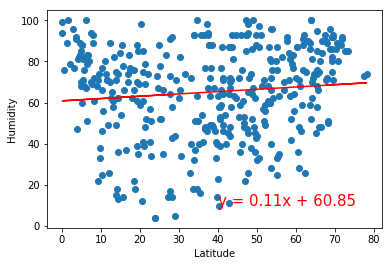

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


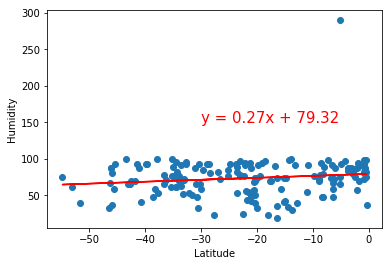

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


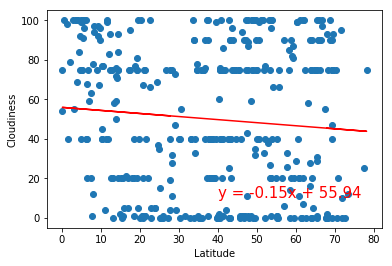

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


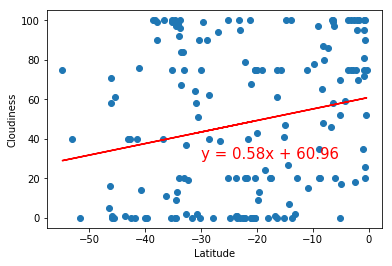

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


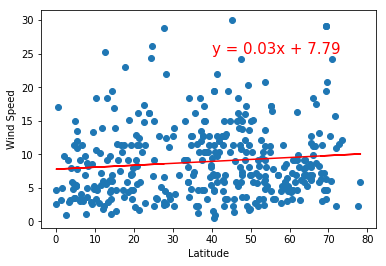

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


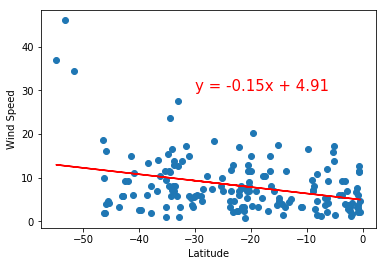